In [1]:
import os
import sys

# Add ppo module in system path
sys.path.append("./")

import import_ipynb
from b_ppo import PPOAgent
from e_utils import boolean_argument

import numpy as np
import torch
import random

import gymnasium as gym

from d_wrappers import (AcrobotActionWrapper,
                        PendulumActionNormalizer,
                        BipedalWalkerRewardWrapper)

importing Jupyter notebook from b_ppo.ipynb
importing Jupyter notebook from a_actor_critic.ipynb
importing Jupyter notebook from c_ppo_utils.ipynb
importing Jupyter notebook from e_utils.ipynb
importing Jupyter notebook from d_wrappers.ipynb


In [2]:
import argparse
from config import args_ppo_acrobot_v1
print(args_ppo_acrobot_v1)

importing Jupyter notebook from /Users/jang-gihwan/Desktop/DeepLearing/ReinforcementLearning/_06_PPO/config/args_ppo_acrobot_v1.ipynb
<module 'config.args_ppo_acrobot_v1' (<import_ipynb.NotebookLoader object at 0x16acece10>)>


In [3]:
class GlobalConfig:
    def __init__(self):
        self.seed = 555
        self.path2save_train_history = "train_history"

In [4]:
def seed_everything(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [5]:
config = GlobalConfig()
seed_everything(config.seed)

In [6]:
def make_env(env_name, render_mode=None):
    # environment
    env_id = env_name
    env = gym.make(env_id, render_mode=render_mode)
    if env_id == "Acrobot-v1":
        env = AcrobotActionWrapper(env)
    elif env_id == "Pendulum-v1":
        env = PendulumActionNormalizer(env)
    elif env_id == "BipedalWalker-v3":
        env = BipedalWalkerRewardWrapper(env)
    else:
        pass
    if hasattr(env, 'seed'):
        env.seed(config.seed)
    return env

In [7]:
def main(args, evaluation=False):
    if not evaluation:
        # ppo agent
        agent = PPOAgent(make_env, args)
        # ppo train
        agent.train()
    else:
        agent = PPOAgent(make_env, args)
        agent.load_predtrain_model(f"{args.path2save_train_history}/actor.pth", f"{args.path2save_train_history}/critic.pth")
        agent.evaluate()

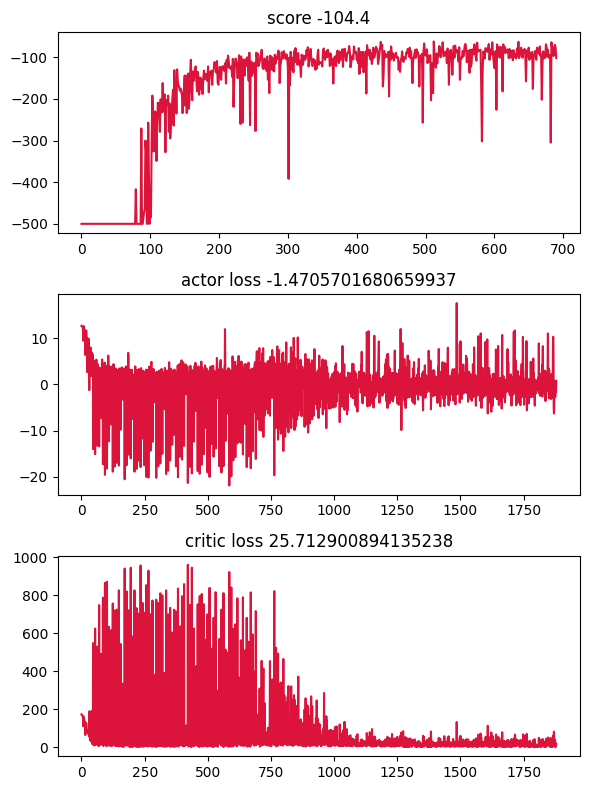

It's solved!


In [8]:
if __name__ == "__main__":
    args = args_ppo_acrobot_v1.get_args()

    args.path2save_train_history = config.path2save_train_history

    if not os.path.exists(args.path2save_train_history):
        try:
            os.mkdir(args.path2save_train_history)
        except:
            dir_path_head, dir_path_tail = os.path.split(args.path2save_train_history)
            if len(dir_path_tail) == 0:
                dir_path_head, dir_path_tail = os.path.split(dir_path_head)
            os.mkdir(dir_path_head)
            os.mkdir(args.path2save_train_history)

    main(args)